定投分析

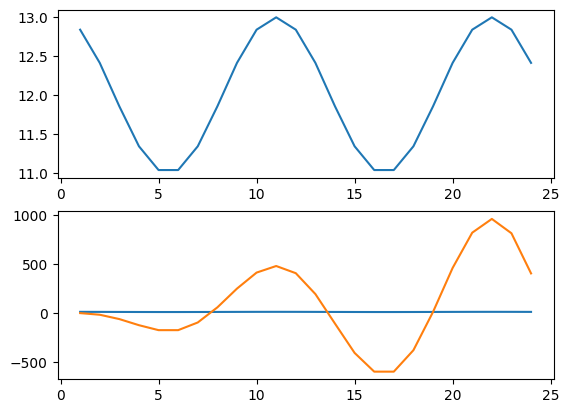

In [1]:
from math import pi, sin, cos, tan
import numpy as np
import matplotlib.pyplot as plt

dt=1
t=0

Y=[]
cost=[]
precent=[]
income=[]

tlist=[]

v=500
T=1.1*dt # 股价波动周期是交易周期的多少倍
amount=0
last_cost=0

for i in range(24):
    t=t+dt
    y=10*(1.2+0.1*cos(2*pi/T * t)) # 股单价函数
    cost.append(last_cost+v)
    
    amount+=v/y # 数量是金额/股单价
    total = amount*y
    tlist.append(t)
    Y.append(y)
    precent.append(total)
    income.append(total-cost[-1])
    
    last_cost=cost[-1]
plt.subplot(211)
plt.plot(tlist, Y)
plt.subplot(212)
plt.plot(tlist, Y)
plt.plot(tlist, income)

# plt.plot(tlist, cost)
# plt.plot(tlist, precent)

股池定投

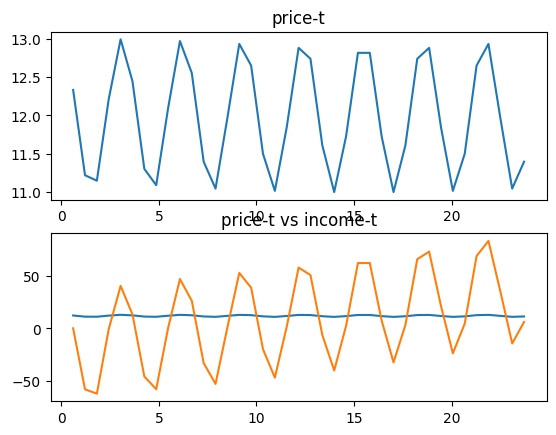

In [2]:
from math import pi, sin, cos, tan
import numpy as np
import matplotlib.pyplot as plt

Y=[]
precent=[]
income=[]

tlist=[]

v0 = 648
T= 3.1  # 股价波动周期(月)
dt=T/5.1 # 交易周期（月）
t=0
period = 24 # 交易时长(月)

amount=0
income_so_far=0
income_t=0

for i in range(round(period/dt)):
    t=t+dt
    y=10*(1.2+0.1*cos(2*pi/T * t)+0*t) # 股单价函数
    if i==0:
        income_t=0 # 排除额外动作之后是整v0存入，整v0提出，所以不算入成本
        funds_precent=v0
    else:
        # 现价
        funds_precent=y*amount
        # 高于v0掏出，低于v0补入
        income_t=funds_precent-v0
    income_so_far += income_t # 累积收入/损失小计
    amount=v0/y # 每次买卖维持固定数额后股票持有数
    
    tlist.append(t)
    Y.append(y)
    precent.append(funds_precent)
    income.append(income_so_far)

plt.subplot(211)
plt.plot(tlist, Y)
plt.title('price-t')
plt.subplot(212)
plt.title('price-t vs income-t')
plt.plot(tlist, Y)
plt.plot(tlist, income)
